# Toyota Used Car Exploratory Data Analysis

The aim of this notebook is to perform exploratory data analysis on the dataset of used toyota cars.

Exploratory Data Analysis Steps:

1. Reading the data using Pandas DataFrame
2. Checking the data types and looking for missing values
3. Checking the basic statistics of the numerical variables
4. Checking the unique values of the categorical features
5. Visualizing the data using Seaborn and Matplot
6. Exploring the data using
    a. Barplots
    b. Piechart
    c. Scatterplots
    d. Regression plot
    e. Pairplot
    f. Histogram
    g. Boxplot
    h. Violin plot

### Import required libraries and packages

In [214]:
#For_Data_Analysis
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Read the CSV file using Pandas dataframe

In [215]:
df = pd.read_csv('toyota.csv')

print (type(df))
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


### Check for data types and any missing values

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


In [217]:
print(df.shape)

print("number of rows = ", df.shape[0])
print("number of columns = ", df.shape[1])

(6738, 8)
number of rows =  6738
number of columns =  8


### Finding out the number of unique values for each 'year'

In [218]:
print(df["year"].unique())
print(type (df["year"].unique()))
print(len (df["year"].unique()))
print(df["year"].value_counts())

[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]
<class 'numpy.ndarray'>
23
2017    2019
2019    1286
2018    1015
2016     997
2015     525
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2001       1
1999       1
2000       1
1998       1
Name: year, dtype: int64


### Finding out the number of unique values for each 'model'

In [219]:
print(df["model"].value_counts())

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64


### Finding out the number of unique values for each 'Transmission' type

In [220]:
print(df["transmission"].value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


### Finding out the number of unique values for each 'fuelType'

In [221]:
print(df["fuelType"].value_counts())

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64


In [222]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


Observations:

    The oldest car in the dataset is from 1998
    The latest car is from 2020
    The average price of each used car is about $12522
    The most expensive car price is around $59995 and the cheapest car price is about $850
    The lowest mileage is 2 mile and highest mileage is around 174419 miles
    The lowest mpg is 2.8 and highest mpg is 235.0
    Engine Size varies from 0 to 4.5

Based on model, transmission, and fuelType,

    What are the top 5 selling car models in the dataset?
    What's the average selling price of the top 5 selling car models?
    What's the total sale of the top 5 selling car models


### Data preprocessing before visualization

Function to preprocess the data

In [223]:
def toyota_preprocessing(data, feature):
    
    # data preprocessing
    df_agg = df.groupby(feature)['price'].agg(['count', 'mean', 'sum'])
    # df_agg = pd.pivot_table(data, index=[feature1], values=['price'] , columns= ['transmission'], aggfunc= aggfuncs , margins=True)

    # sort the dataframe based on the column feature
    df_agg = df_agg.sort_values(by=('count'), ascending=False)

    # create a new column percentage of the cars in each model
    df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

    # convert the 'sum' column in millions
    df_agg['sum'] = df_agg['sum']/1000000

    # keep up to two decimal points
    df_agg = df_agg.round(2)

    # remove the 'count' column
    df_agg = df_agg.drop('count', axis=1)

    return(df_agg)

# display(df_pivot.head())

test = toyota_preprocessing(df , 'model')
# test = test.sort_values(by=( 'transmission'), ascending=False)


# test = test.sort_values('All' ,ascending= True)

display(test.head())

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


### Function to show the subplots in barplot

In [224]:
def categorical_barplot(data , feature , fig_height):
    plt.figure(figsize=(20, fig_height))

    plt.subplot(1, 3, 1)
    sns.barplot(x='percent_of_cars', y=data.index, data=data, orient='h', color="blue")
    plt.title(f"Percentage of cars in each {feature}")
    plt.xlabel("Percentage of cars (%)")
    # plt.grid()

    plt.subplot(1, 3, 2)
    sns.barplot(x='mean', y=data.index, data=data, orient='h', color="brown")
    plt.title(f"Average resale value of the cars of each {feature}")
    plt.xlabel("Average price ($)")
    plt.ylabel("")

    plt.subplot(1, 3, 3)
    sns.barplot(x='sum', y=data.index, data=data, orient='h', color="green")
    plt.title(f"Total resale value of the cars by each {feature}")
    plt.xlabel("Total price in million $")
    plt.ylabel("")

    plt.suptitle(f"Barplot of the Toyota used car based on {feature}")
    plt.tight_layout()
    plt.show()

### Based on Model

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


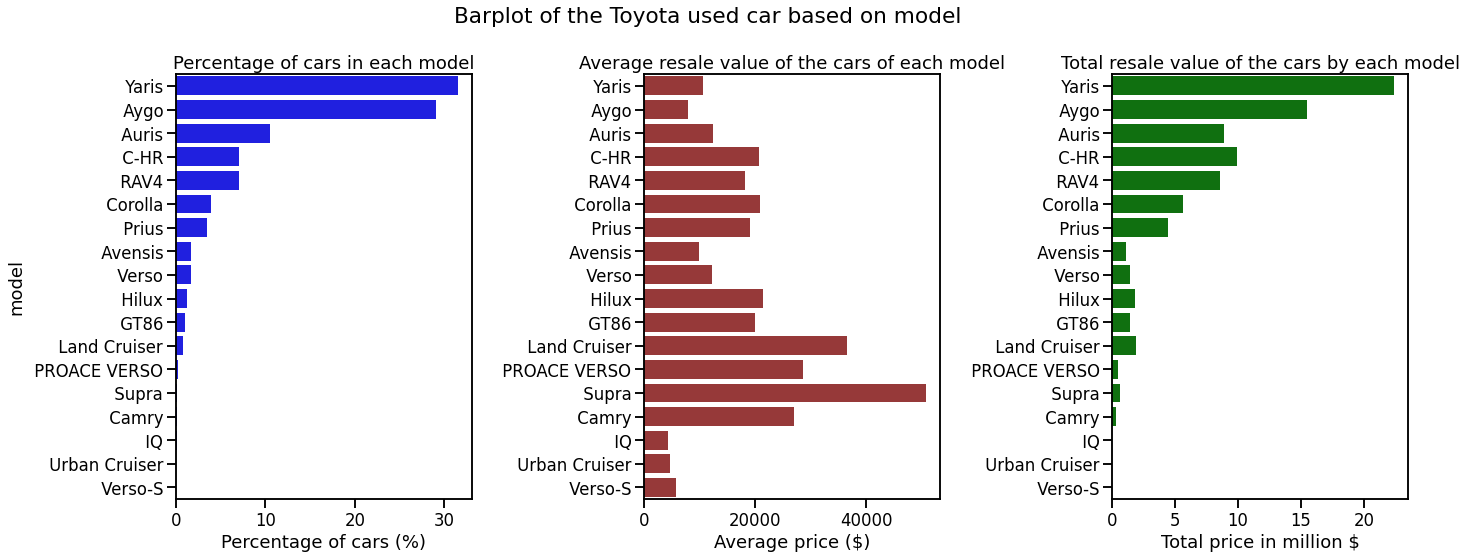

In [225]:
df_toyota_model = toyota_preprocessing(df , 'model')

display(df_toyota_model.head())

categorical_barplot(df_toyota_model, 'model' , 8)

 Observations:

    Top 5 selling car models are Yaris (31.49%), Aygo (29.10%), Auris (10.57%), C-HR (7.11%) and RAV4 (7.02%)
    Top 5 average reselling price car models are Supra (~$48,000), Land Cruiser (`$37,000), PROACE VERSO (~$29,000), Camry (~$27,000), Hilux (~$20,000)
    Top 5 total reselling price car models are Yaris (~$21.5M), Aygo (~$15M), C-HR (~$9M), Auris (~$8M), and RAV4 (~$7.5)

### Based on transmission

,mean,sum,percent_of_cars
transmission,,,
Manual,9551.50,36.54,56.78
Automatic,16582.83,44.06,39.43
Semi-Auto,14797.14,3.76,3.77
Other,12795.00,0.01,0.01


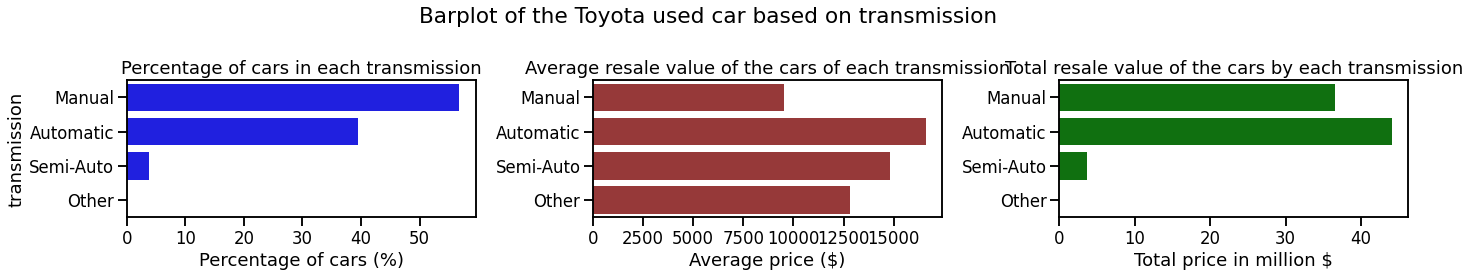

In [226]:
df_toyota_transmission = toyota_preprocessing(df , 'transmission')

display(df_toyota_transmission.head())

categorical_barplot(df_toyota_transmission, 'transmission' , 4)

Observations:

    Top selling car type by transmission is Manual (56.78%) then Automatic (39.43%) followed by Semi-Auto (3.77%).
    Avarage reselling price of car type by transmission are Automatic ($16,582.83), Semi-Auto ($14,797.14), Other ($12,795), and Manual ($9,551.40).
    Total reselling price of car type by transmission are Automatic ($44.06M), Manual ($36.54M), and lastly Semi-Auto ($3.76M).



### Based on fuelType

,mean,sum,percent_of_cars
fuelType,,,
Petrol,9759.54,39.89,60.66
Hybrid,17185.47,35.11,30.32
Diesel,15697.81,7.90,7.47
Other,14121.16,1.48,1.56


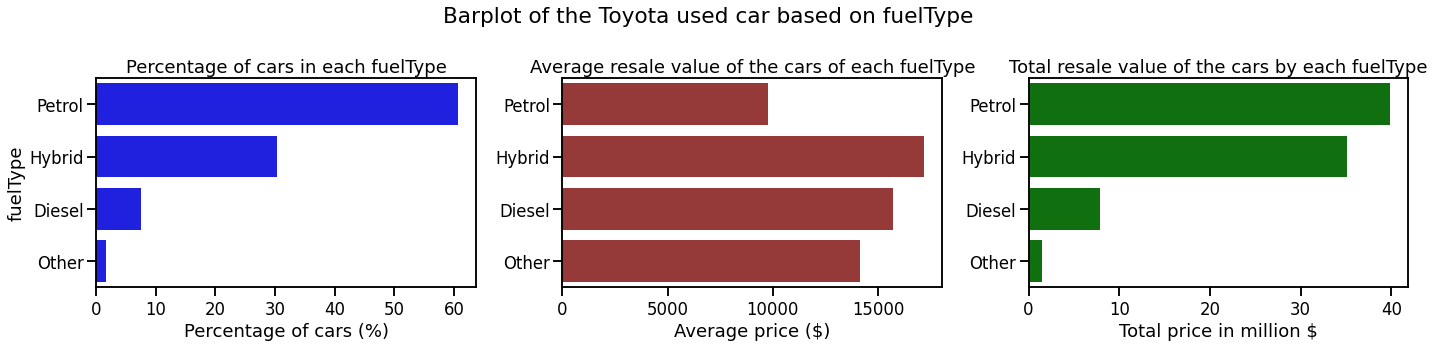

In [227]:
df_toyota_fuel = toyota_preprocessing(df , 'fuelType')

display(df_toyota_fuel.head())

categorical_barplot(df_toyota_fuel, 'fuelType' , 5 )

Observations:

    Top selling car type by fueltype are Petrol (60.66%), Hybrid (30.32%), Diesel (7.47%), and Other (1.56%).
    Avarage reselling price of car type by fueltype are Hybrid ($17185.47), Diesel ($15697.81), Other ($14121.16), and Petrol ($9759.54).
    Total reselling price of car type by fueltype are Petrol ($39.89M), Hybrid ($35.11M), Diesel ($7.90), and Other ($1.48).


### Pie Chart (Transmission)

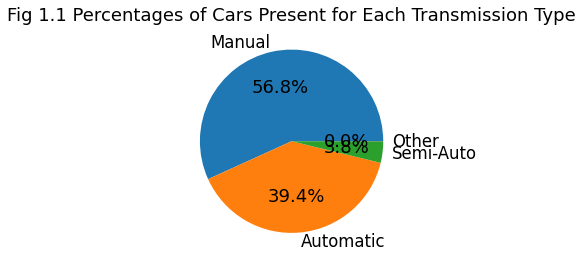

In [228]:
df["transmission"].value_counts().plot(kind="pie" , autopct='%1.1f%%', startangle=0)
plt.ylabel(" ")
plt.title("Fig 1.1 Percentages of Cars Present for Each Transmission Type")

plt.tight_layout()
plt.show()

### Pie Chart (fuelType)

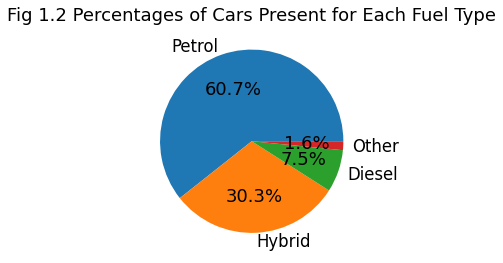

In [229]:
df["fuelType"].value_counts().plot(kind="pie" , autopct='%1.1f%%', startangle=0)
plt.ylabel(" ")
plt.title("Fig 1.2 Percentages of Cars Present for Each Fuel Type")

plt.tight_layout()
plt.show()

### Finding out the number of unique values for 'fuelType'

In [230]:
print(df["fuelType"].value_counts())
print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Petrol,4087
Hybrid,2043
Diesel,503
Other,105


Index(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype='object')
Index(['fuelType'], dtype='object')


### Calculating the '% of cars' column (1)

In [231]:
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType","fuelType":"no_of_cars"})

#df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])
df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100

df_fuelType = df_fuelType.round(2)

display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Petrol,4087,60.66
1,Hybrid,2043,30.32
2,Diesel,503,7.47
3,Other,105,1.56


### Bar Plot (fuelType)

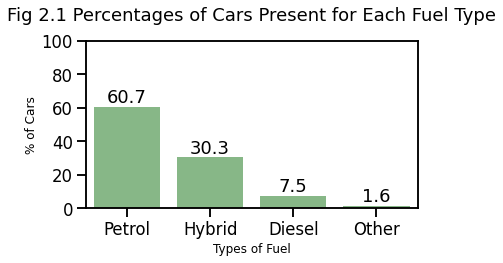

In [232]:
barplot_fuelType = sns.barplot(x="fuelType", y="% of cars", data=df_fuelType, color="green", alpha=0.5)

for p in barplot_fuelType.patches:
    barplot_fuelType.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Types of Fuel", size=12)
plt.ylabel("% of Cars", size=12)
#plt.title("Fig 2.1 Percentages of Cars Present for Each Fuel Type")
plt.yticks(np.arange(0,101,20))
plt.title("Fig 2.1 Percentages of Cars Present for Each Fuel Type", pad=20) 

plt.tight_layout()
plt.show()

### Calculating the '% of cars' column (2)

In [233]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission","transmission":"no_of_cars"})

##df_fuelType["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])
df_transmission["% of cars"] = (df_transmission["no_of_cars"]/df.shape[0])*100

df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,no_of_cars,% of cars
0,Manual,3826,56.78
1,Automatic,2657,39.43
2,Semi-Auto,254,3.77
3,Other,1,0.01


### Bar Plot (Transmission)

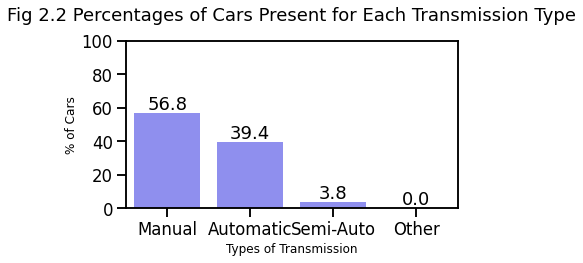

In [234]:
barplot_transmission = sns.barplot(x="transmission", y="% of cars", data=df_transmission, color="blue", alpha=0.5)

for p in barplot_transmission.patches:
    barplot_transmission.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel("Types of Transmission", size=12)
plt.ylabel("% of Cars", size=12)
plt.title("Fig 2.2 Percentages of Cars Present for Each Transmission Type", pad=20)
plt.yticks(np.arange(0,101,20))

plt.tight_layout()
plt.show()

#### Comment:
    
In this notebook, two pie charts and bar plots were visualized using the dataset of used Toyota cars. The categorical
variables used were 'Transmission' and 'fuelType.' In both cases, barplot turned out to be a better tool for representing
the aforementioned categorical variable when compared to the pie charts for the following reasons:
    
Firstly, in most cases, a pie chart is only effective when there are two, at most three variables to be represented.
As it can be seen from above, for both 'Transmission' and 'fuelType' columns, there were four separate variables,
making the use of the pie-chart somewhat ineffective. Having said that, it can be adjudged that the pie chart for the
'fuelType' column is superior to its 'transmission' column counterpart. This is because the latter had a type (other)
that had a value corresponding to 0.01% which consequently was too small for the pie chart to depict.

On the other hand, bar plots for both categorical variables were far more legible and comprehensive. However, even 
here, the 'other' type in the bar plot for 'transmission' was too miniscule to be visible. 


### End of Homework 2

### Beginning of Homework 3

### Import required libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

### Load the dataset

In [236]:
df = pd.read_csv("toyota.csv")

display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,36.2,2.0


### Evaluate the data and look for any missing value

In [237]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


In [239]:
print(len(df["model"].unique()))
#display(len(df["model"].unique()))

18


In [240]:
print(len(df["year"].unique()))
print(df["year"].unique())

23
[2016 2017 2015 2020 2013 2019 2018 2014 2012 2005 2003 2004 2001 2008
 2007 2010 2011 2006 2009 2002 1999 2000 1998]


In [241]:
print(len(df["transmission"].unique()))
print(df["transmission"].unique())

4
['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [242]:
print(len(df["fuelType"].unique()))
print(df["fuelType"].unique())

4
['Petrol' 'Other' 'Hybrid' 'Diesel']


In [243]:
print(df.shape)

(6738, 8)


In [244]:
#another way of checking missing values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

### Finding out the relation between the numerical variables

price=Target Variable

rest of the variables=Feature Variable

    #Scatterplot of mileage vs price
    #Scatterplot of year vs price

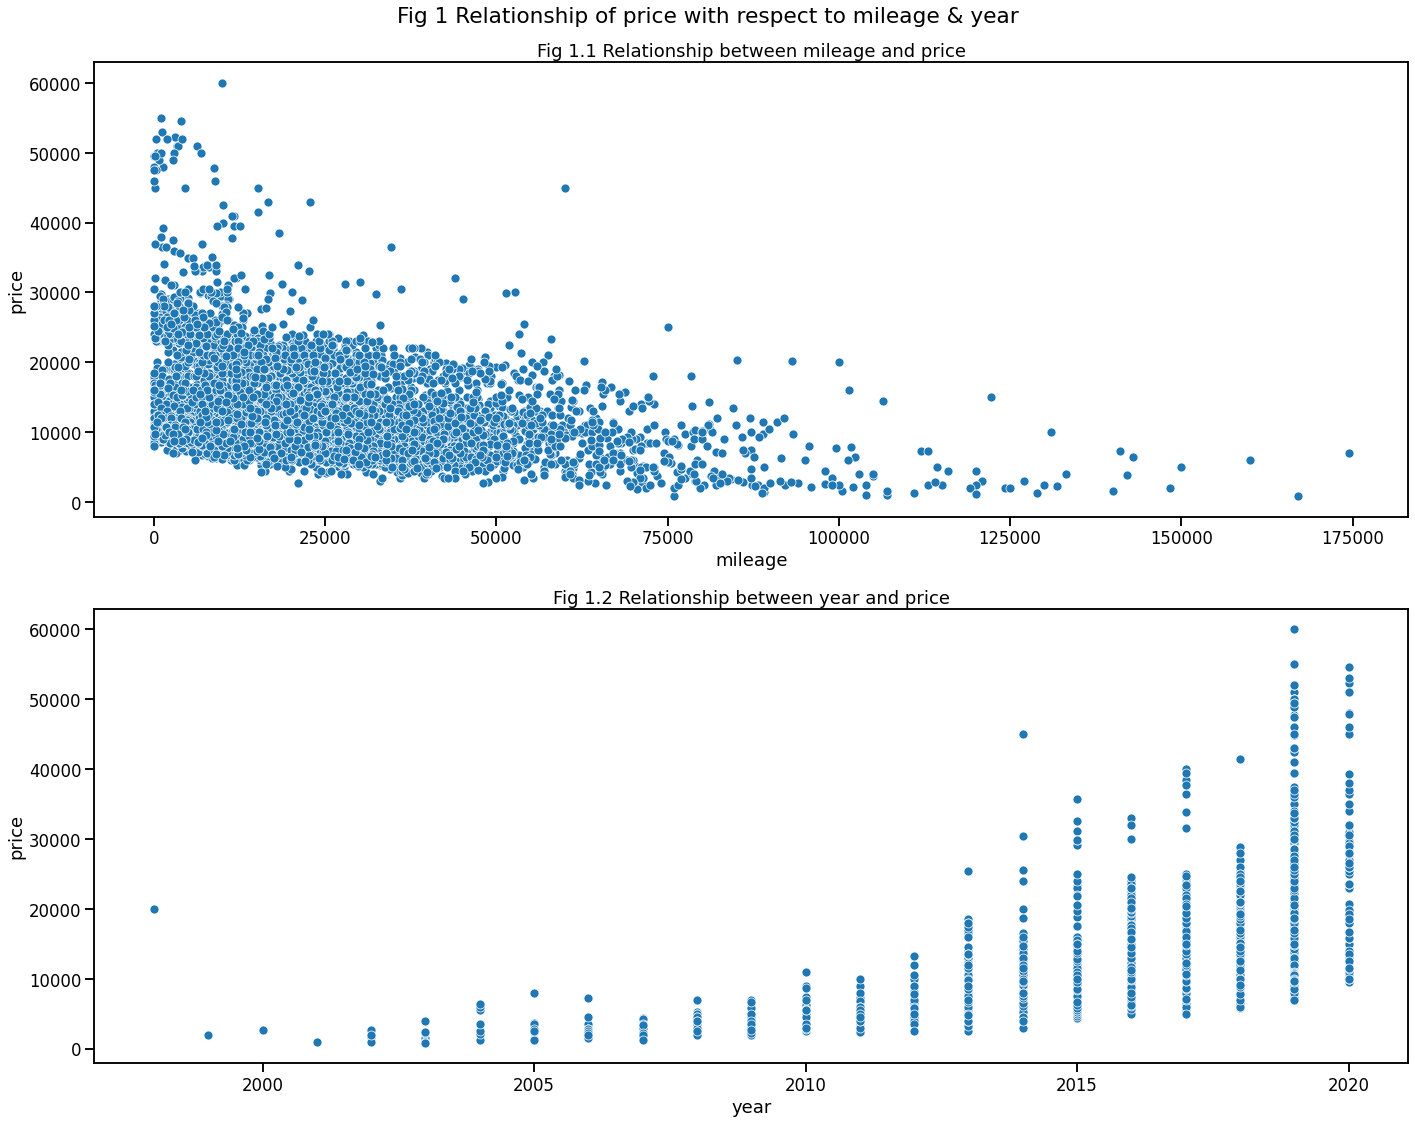

In [245]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df)
plt.title("Fig 1.1 Relationship between mileage and price")

plt.subplot(2, 1, 2)
sns.scatterplot(x="year", y="price", data=df)
plt.title("Fig 1.2 Relationship between year and price")

plt.suptitle("Fig 1 Relationship of price with respect to mileage & year")

plt.tight_layout()
plt.show()

Comment:

In fig 1.1, it is observed that there is an inverse relation between mileage and price. In other words, as the overall mileage of the car increases, the price of the car decreases.

In fig 1.2, it is seen that, in general, the price-range of the car increases with each progressing year.

## Changing the hue parameter

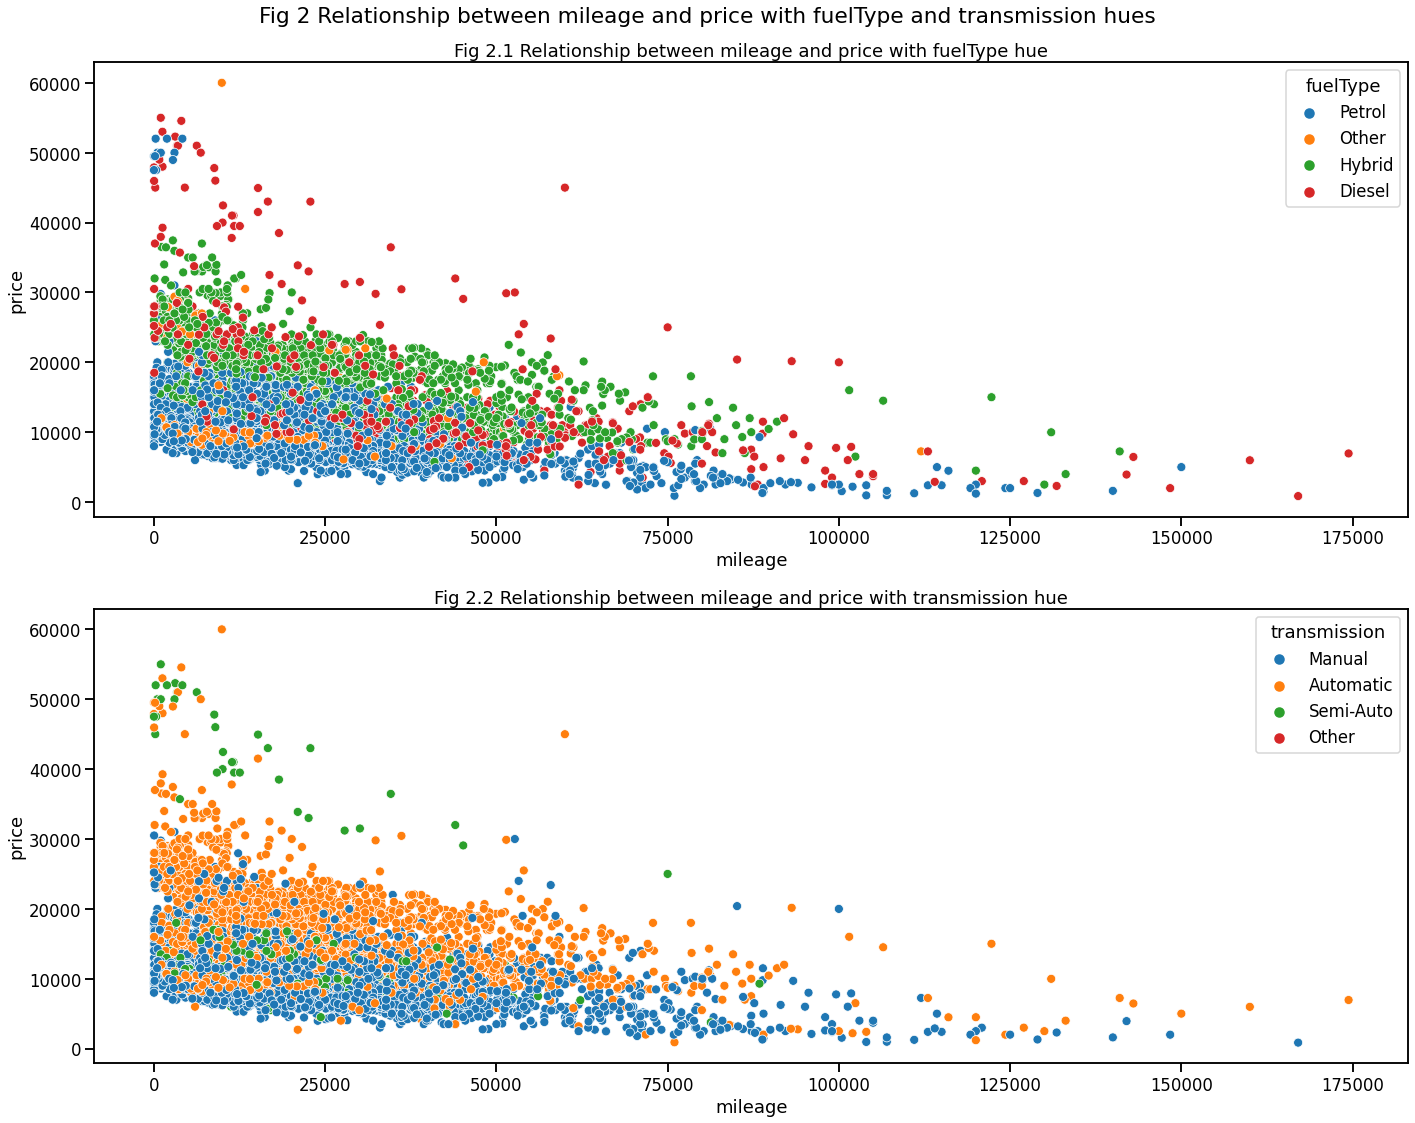

In [246]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")
plt.title("Fig 2.1 Relationship between mileage and price with fuelType hue")

plt.subplot(2, 1, 2)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")
plt.title("Fig 2.2 Relationship between mileage and price with transmission hue")

plt.suptitle("Fig 2 Relationship between mileage and price with fuelType and transmission hues")

plt.tight_layout()
plt.show()

Comment:

Fig 2.1 suggests that the cars running on petrol are generally cheaper, with the exception of a few outliers. They are followed by Hybrid cars which fall mostly in the mid-level price range. It can also be inferred that cars running on diesel are usually more expensive than their other counterparts. There is another fueltype called 'other' and, from the graph, it appears that they are hovering in the low-level price range, excluding some cars which are spread over the mid-level range.

Fig 2.2 implies that manual transmission cars are the cheapest of the lot, followed by automatic transmission cars. Cars with semi-auto transmission are scattered all over the graph. However, the graphs do suggest that the more expensive cars are more likely to have either a semi-automatic or an automatic transmission. The number of cars with 'other' transmission types is negligible.

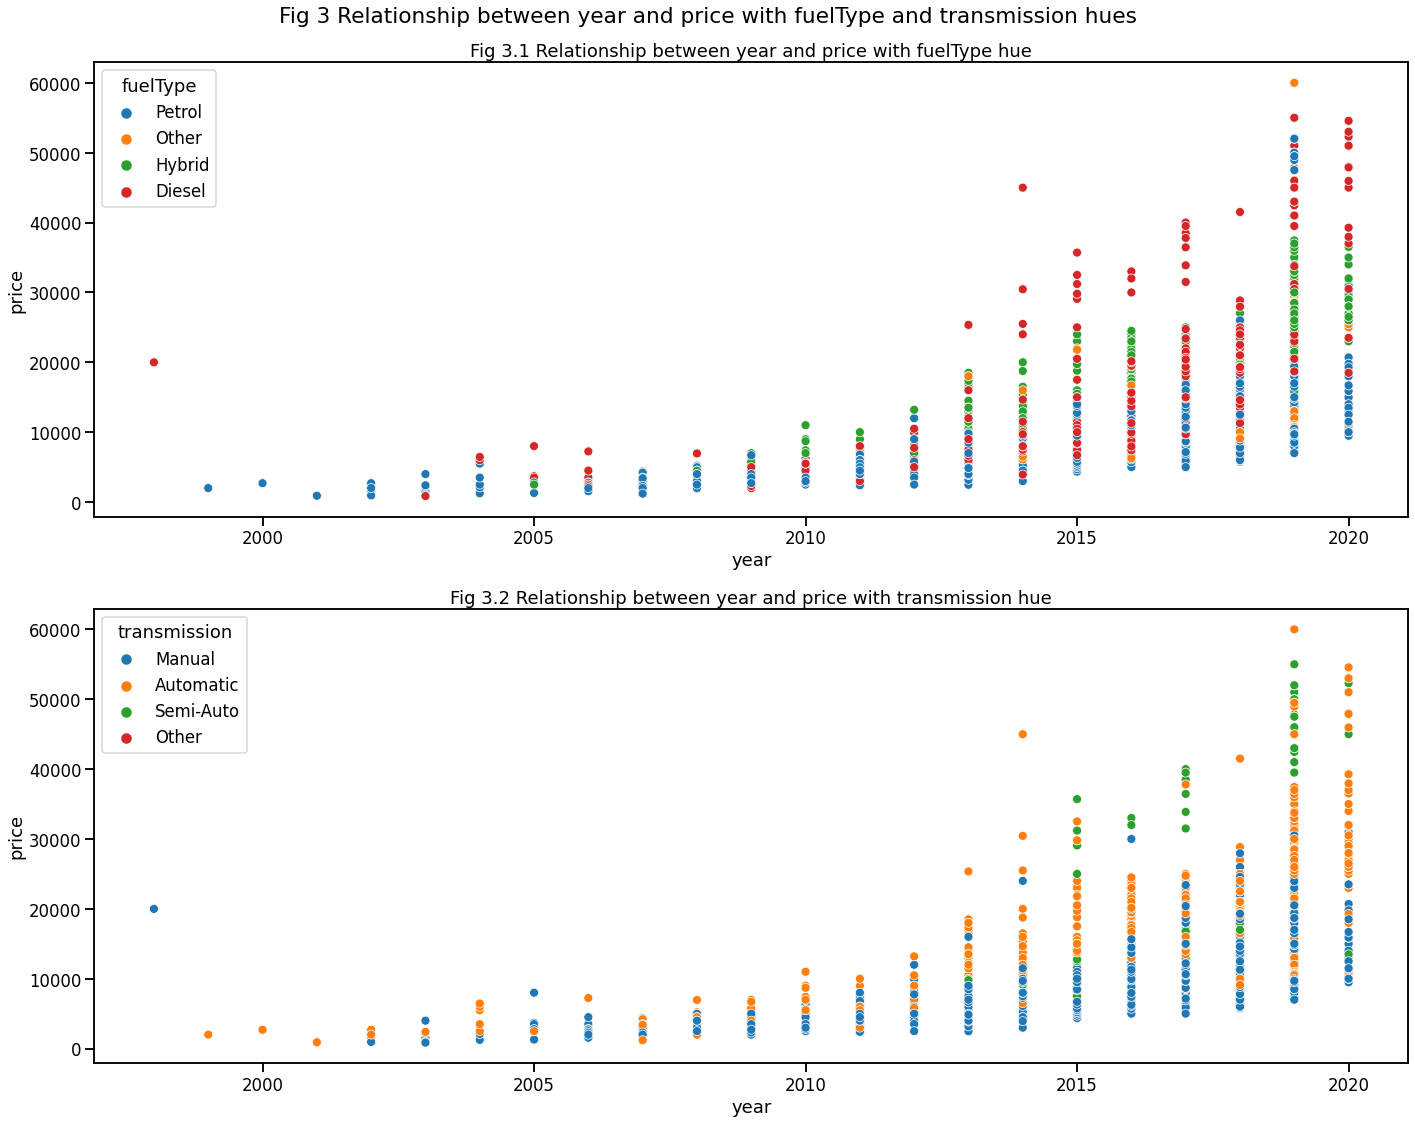

In [247]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
sns.scatterplot(x="year", y="price", data=df, hue="fuelType")
plt.title("Fig 3.1 Relationship between year and price with fuelType hue")

plt.subplot(2, 1, 2)
sns.scatterplot(x="year", y="price", data=df, hue="transmission")
plt.title("Fig 3.2 Relationship between year and price with transmission hue")

plt.suptitle("Fig 3 Relationship between year and price with fuelType and transmission hues")

plt.tight_layout()
plt.show()

Comment:

Fig 3.1 reiterates the findings from Fig 2.1: Cars running on petrol are generally cheaper throughout the years. They are followed by hybrid cars. More expensive cars usually run on diesel.

Fig 3.2 suggests the same idea as Fig 2.2. Manual transmission cars, on most occasions, are cheaper. They are followed by cars with automatic transmissions. Semi-automatic transmission cars are, in general, more expensive.

### Creating a trend line

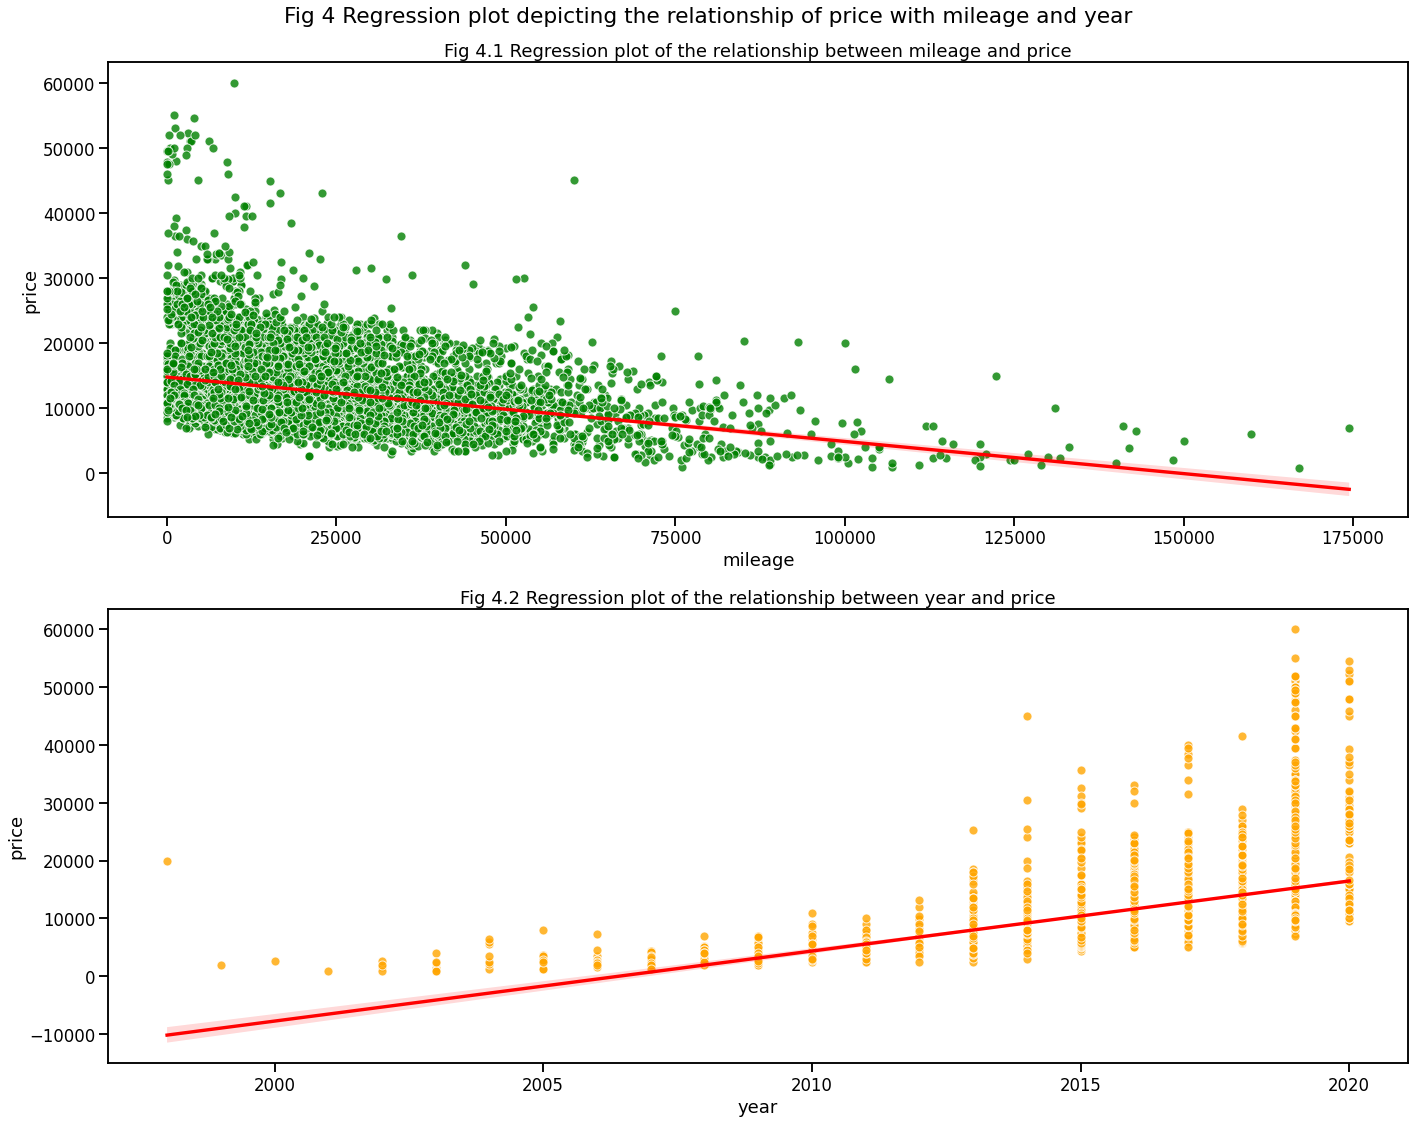

In [248]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"green", "edgecolor":"white"}, line_kws={"color":"red"})
plt.title("Fig 4.1 Regression plot of the relationship between mileage and price")

plt.subplot(2, 1, 2)
sns.regplot(x="year", y="price", data=df, scatter_kws={"color":"orange", "edgecolor":"white"}, line_kws={"color":"red"})
plt.title("Fig 4.2 Regression plot of the relationship between year and price")

plt.suptitle("Fig 4 Regression plot depicting the relationship of price with mileage and year")

plt.tight_layout()
plt.show()

Comment:

According to Fig 4.1, in general, the price and mileage share a negative correlation. The price of a car gets cheaper as its mileage increases.

As per Fig 4.2, the price of the car and the year when it came out, usually share a positive correlation. It means that the more recent cars are generally more expensive.

## Pairplot

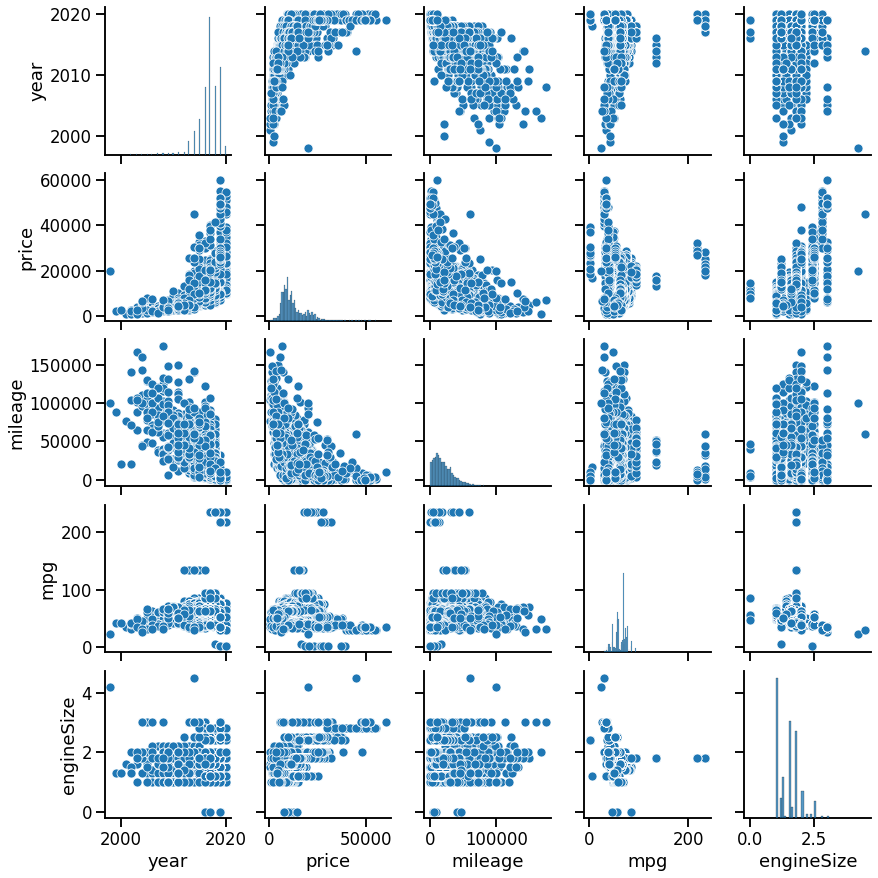

In [249]:
sns.pairplot(df)

plt.show()

Comment:

Unfortunately, there are many unnecessary information in this plot, making it rather difficult to comprehend.

### Removing redundant information

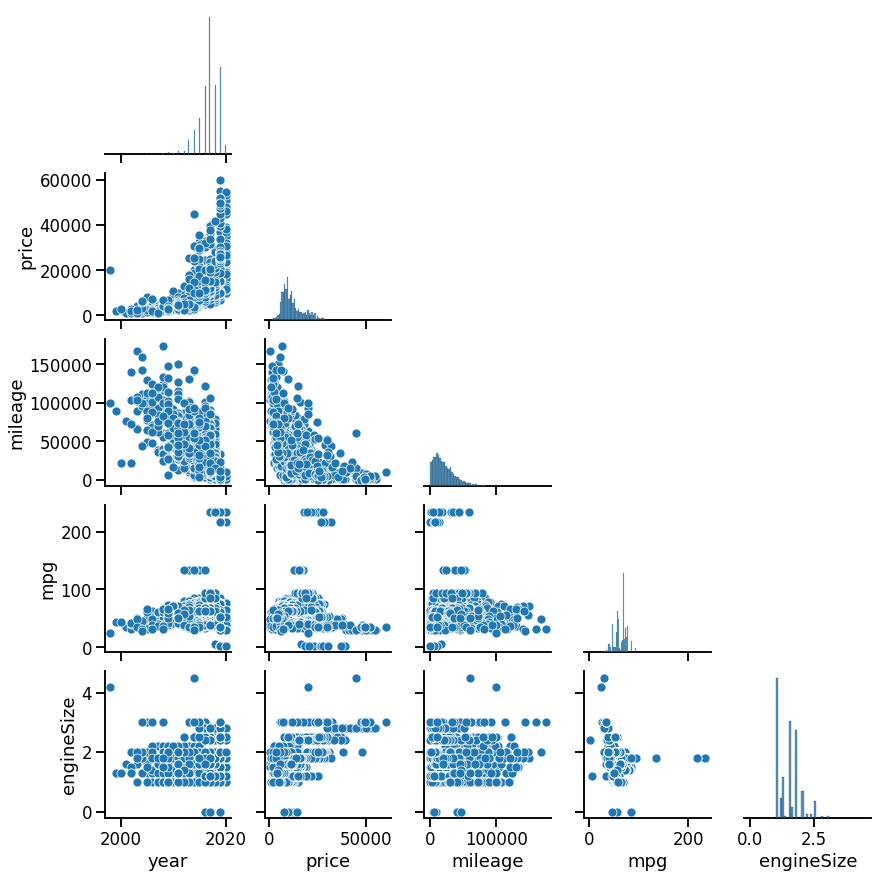

In [250]:
sns.pairplot(df, corner=True)
plt.show()

### Incorporating hue

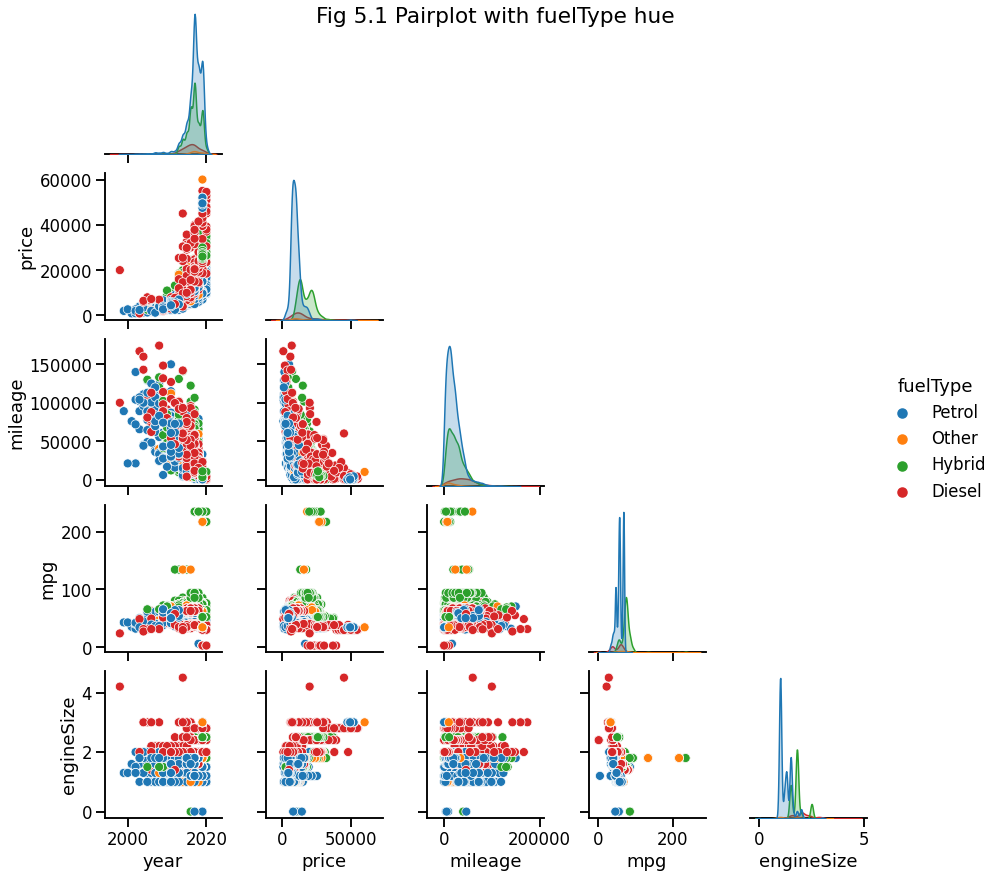

In [251]:
sns.pairplot(df, corner=True, hue="fuelType")
plt.suptitle("Fig 5.1 Pairplot with fuelType hue")

plt.show()

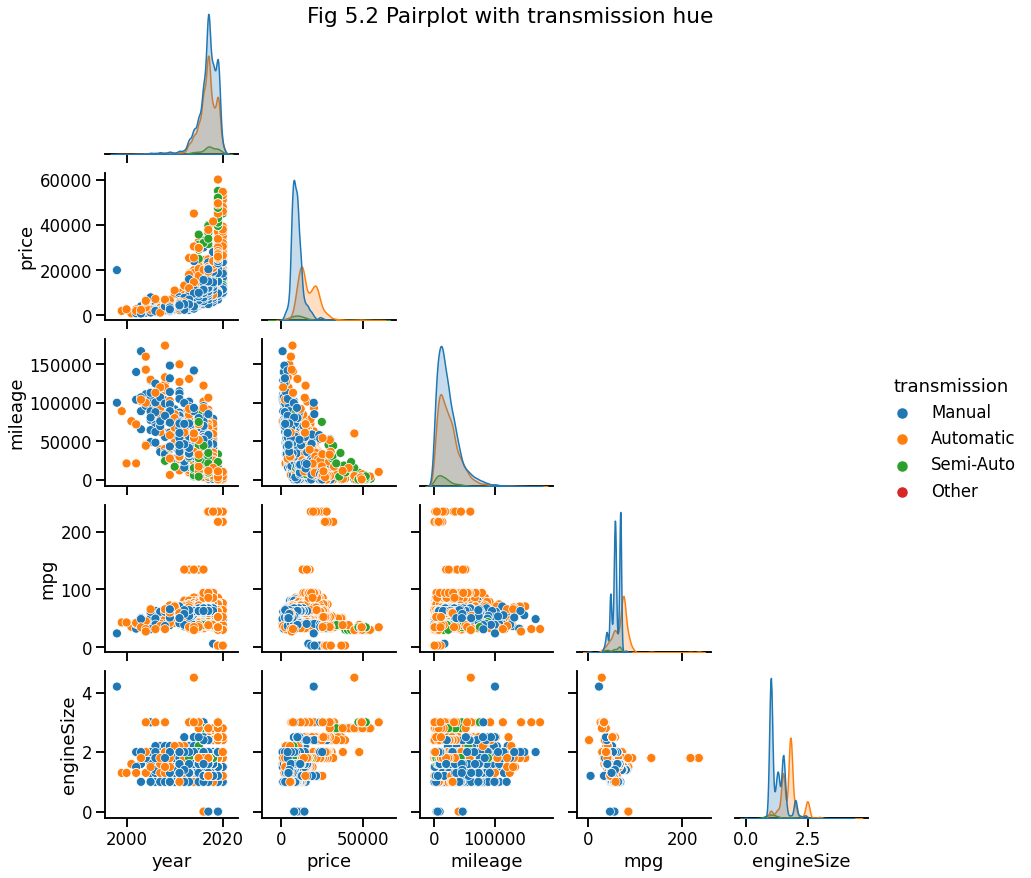

In [252]:
sns.pairplot(df, corner=True, hue="transmission")

plt.suptitle("Fig 5.2 Pairplot with transmission hue")

plt.show()

Comment

From fig 5.1 and 5.2, it appears that incorporating hue for so many different plots may decrease the clarity of the graph.

### End of Homework 3

### Beginning of Homework 4

### Import required libraries

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

### Laad the Dataset

In [254]:
df = pd.read_csv("toyota.csv")

display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,36.2,2.0


### Evaluate the data and look for any missing value

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


In [256]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


### Plotting Histogram

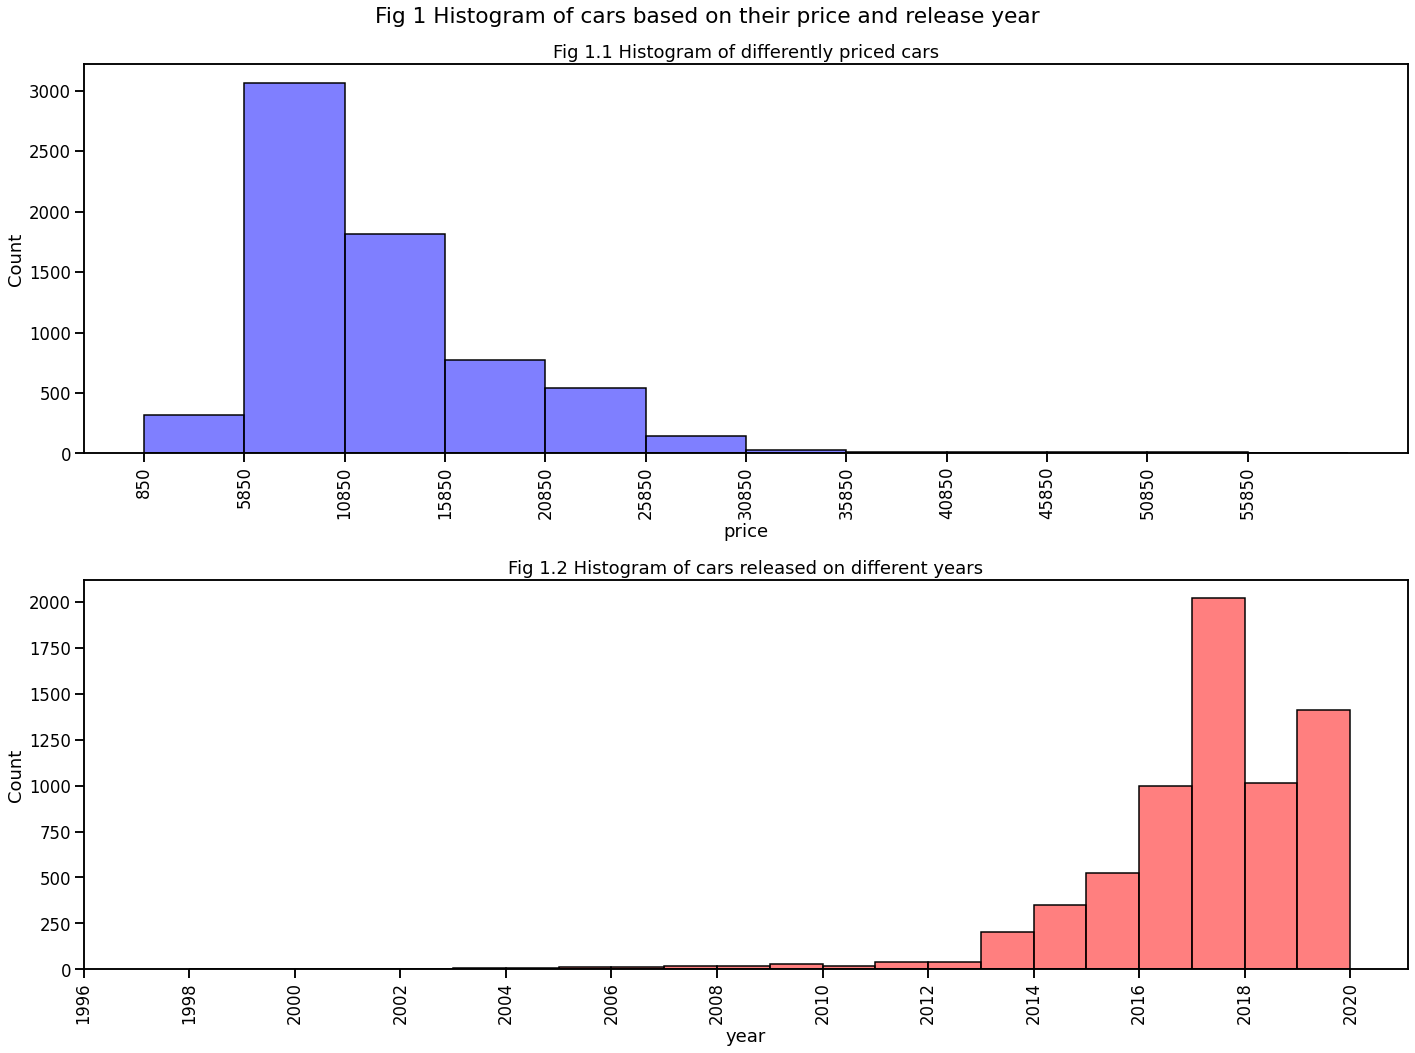

In [257]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
sns.histplot(data=df, x='price', binwidth=5000, color="blue", alpha=0.5)
plt.xticks(np.arange(df["price"].min(), df["price"].max()+51, 5000), rotation=90)
plt.title("Fig 1.1 Histogram of differently priced cars")


plt.subplot(2,1,2)
sns.histplot(data=df, x='year' , binwidth=1, color="red", alpha=0.5)
plt.xticks(np.arange(1996,2022,2), rotation=90)
plt.title("Fig 1.2 Histogram of cars released on different years")

plt.suptitle("Fig 1 Histogram of cars based on their price and release year")

plt.tight_layout()
plt.show()

Comments:

Fig 1.1 shows that the price of the cars with the highest frequency cost around $5850-10850 range. About 3000 cars belong to this particular range.

Fig 1.2 displays that the maximum number of cars of this dataset was from 2017. In other words, the year 2017 alone contributed around 2000 cars while the next best was 2020 with about 1400 cars.  

### Boxplot

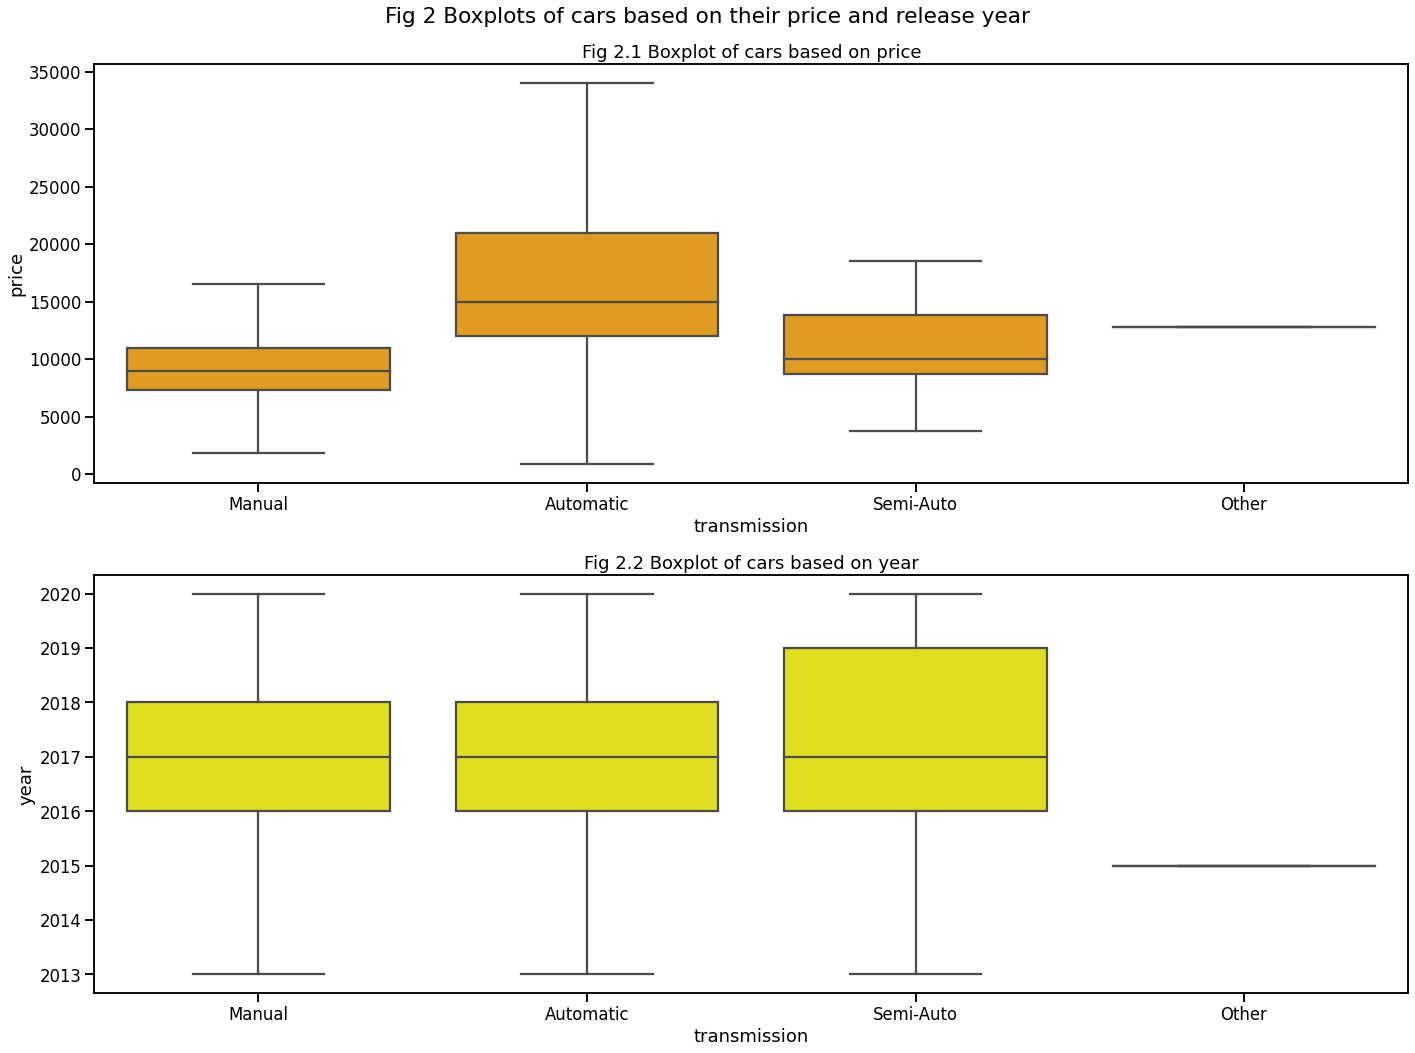

In [258]:
plt.figure(figsize=(20,15))
 
plt.subplot(2,1,1)
sns.boxplot(y=df["price"], x=df['transmission'] ,showfliers=False, color= "orange")
plt.title("Fig 2.1 Boxplot of cars based on price")

plt.subplot(2,1,2)
sns.boxplot(y=df["year"], x=df['transmission'] ,showfliers=False, color= "yellow")
plt.title("Fig 2.2 Boxplot of cars based on year")


plt.suptitle("Fig 2 Boxplots of cars based on their price and release year")

plt.tight_layout()
plt.show()

Comments:

In Fig 2.1, it can be seen that the highest median (about 1500 dollars), range (about 34000 dollars), and inter-quartile range (about 9000 dollars) belongs to the automatic transmission type. This suggests that typically cars with automatic transmission will be somewhat more expensive than other transmission types. Cars with manual transmissions are the cheapest with a median value of around 8000 dollars. Semi-automatic cars are next on the list with a median value of about 10,000 dollars.

In Fig 2.2, it can be observed that the median and range for all three transmission types (excluding 'other') are identical. However, the inter-quartile range for semi-automatic transmission is greater. This implies that if you are trying to pick a car that has been released after 2018, it has more chance of being a semi-automatic transmission car.

### Violin Plot

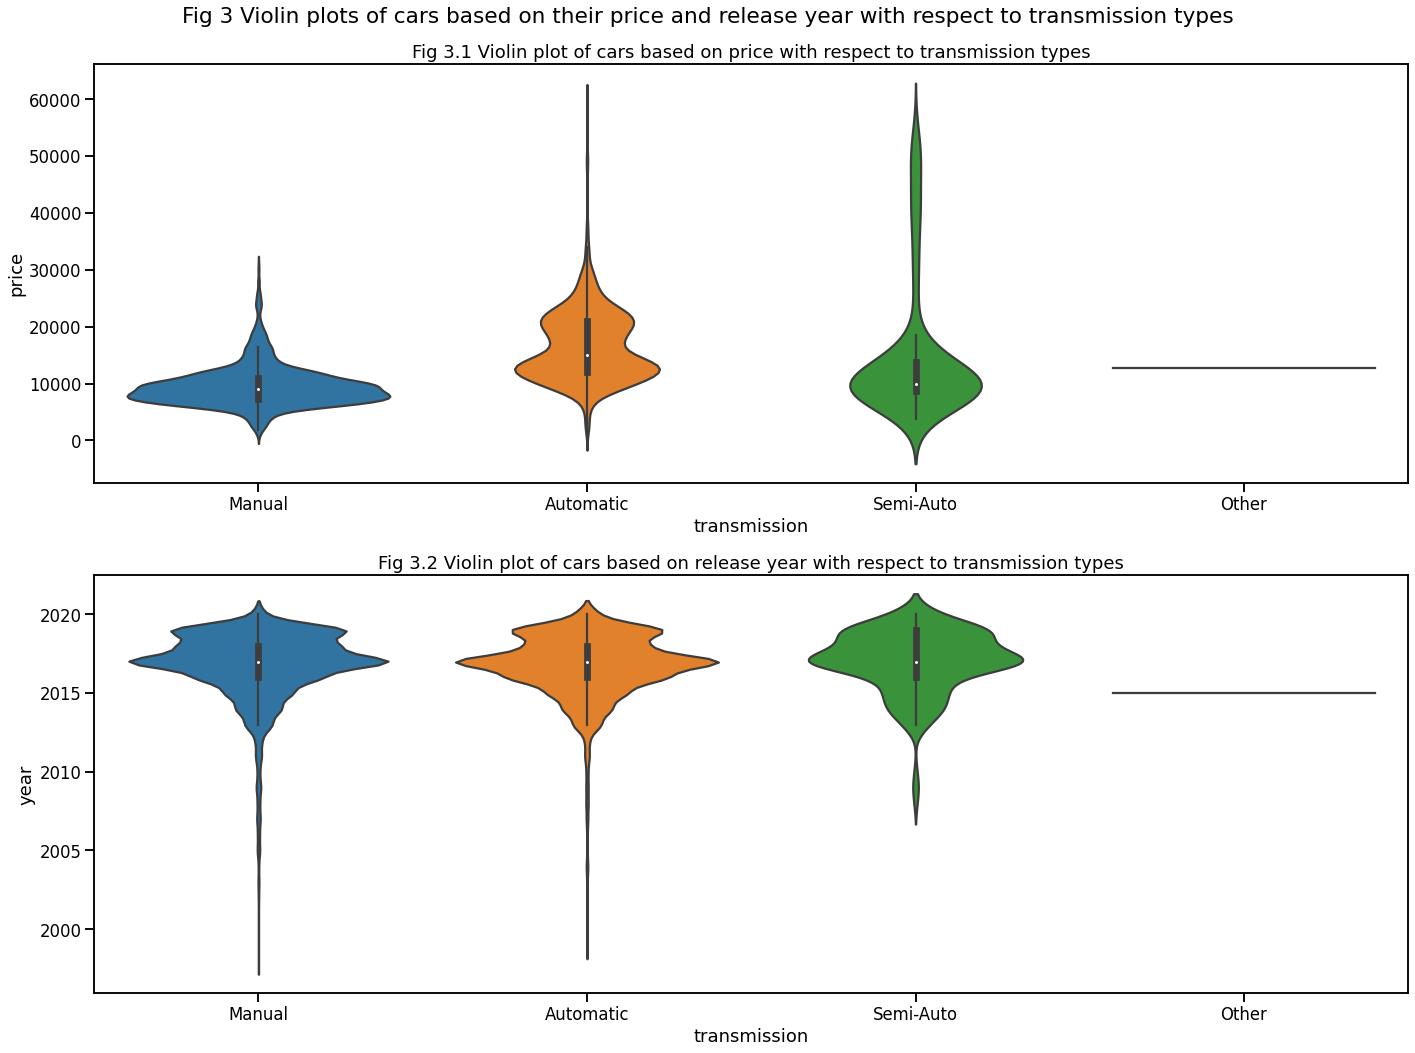

In [259]:
plt.figure(figsize=(20,15))
 
plt.subplot(2,1,1)
sns.violinplot(x="transmission", y="price", data=df, showfliers=False)
plt.title("Fig 3.1 Violin plot of cars based on price with respect to transmission types")

plt.subplot(2,1,2)
sns.violinplot(x="transmission", y="year", data=df, showfliers=False)
plt.title("Fig 3.2 Violin plot of cars based on release year with respect to transmission types")

plt.suptitle("Fig 3 Violin plots of cars based on their price and release year with respect to transmission types")

plt.tight_layout()
plt.show()

Comments:

From Fig 3.1, it can be inferred that most manual transmission cars will cost around 8,000 dollars.On the other hand, automatic transmission cars have one peak at about 12,000 dollars and another slightly smaller peak at 20,000 dollars. This means that most cars with automatic transmission will cost about $ 12,000 but another significant portion will cost much higher at 20,000 dollars. Most cars with semi-automatic transmission will cost the same as cars with manual transmission. But unlike the manual and automatic, semi-automatic has a wider range of prices, and the most expensive cars are likely to have these transmission types.

Fig 3.2 shows that when it comes to release year, cars with manual, automatic, and semi-automatic transmission types have a somewhat similar distribution. However, it looks like the pre-2010 cars are more likely to have a manual transmission type.

Hues were not used in these plots as the process of comprehending the graph got difficult with them.

#### Comparisons between different plot types:

All these plots namely Histogram, Boxplot, and Violin plot have their share of pros and cons.

In terms of readability and ease of understanding, Histogram will probably be the easiest to decipher for non-technical people. However, compared to boxplots and violin plots, the histogram can only provide us with a relatively low amount of data. 

Having said that, though boxplot and violin plot will have the upper hand in this regard, they are not free from issues. Both boxplot and violin plot are incapable of providing us with the mean value. Also, although they can give us the percentile and distribution range respectively, they cannot display the numbers that correspond to this percentile or distribution visually. For example, in Fig 3.2, both automatic and semi-automatic transmission types have similar distribution despite the fact that automatic transmission accounts for a staggering 39.4% of the entire dataset while semi-automatic represents just 3.8%.

In conclusion, I suppose that all these plot types have their merits and demerits but none of them can be termed as a clear-cut favorite. On the contrary, I would comment that these plots work best when they are utilized together. In this way, they can provide us with better insights and more well-rounded inferences.

### End of Homework 4